In [1]:
#Universidade Federal de Pernambuco
#Disciplina: Macroeconomia 2
#Professor: Marcelo Silva
#Aluno: Paulo Francisco da Silva Junior

In [2]:
#Importações
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#Importando dados
series = pd.read_excel("/content/ipeadata[15-10-2021-09-23].xls")

In [4]:
#Simplificando colunas
series.columns=["Data","PIB - preços de mercado", "consumo final - famílias"]

In [5]:
#Checando dados
series.head()

,Data,PIB - preços de mercado,consumo final - famílias
0,1996 T1,99.548410,98.869380
1,1996 T2,100.431257,100.907205
2,1996 T3,104.368107,103.664913
3,1996 T4,103.296654,109.182520
4,1997 T1,104.309557,106.656631


In [6]:
#Corrigindo o objeto para data
series["Data"] = pd.DatetimeIndex(series["Data"])

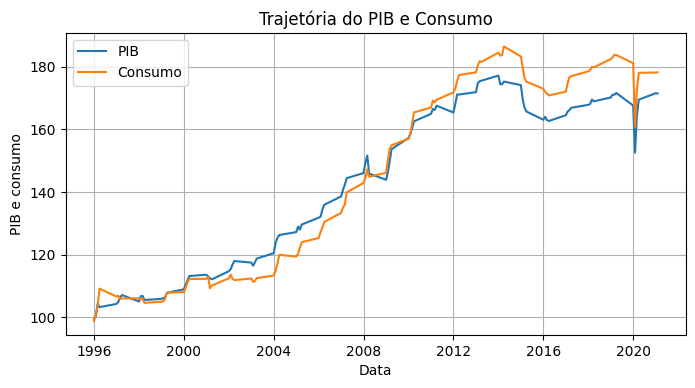

In [7]:
#Plotando trajetória do pib e consumo
plt.figure(figsize=(8, 4), dpi=100)
plt.title('Trajetória do PIB e Consumo')
plt.plot(series["Data"],series["PIB - preços de mercado"], label="PIB")
plt.plot(series["Data"],series["consumo final - famílias"], label="Consumo")
plt.xlabel("Data")
plt.ylabel("PIB e consumo")
plt.grid()
plt.legend()
plt.show()

PIB e consumo parecem seguir a mesma trajetória ao longo do tempo

Agora faça o seguinte: Aplique o filtro HP (Hodrick-Prescott) nas duas séries. 

Lembre-se que pelo filtro são gerados duas séries: Y(t) = YT(t)+YC(t). 

Onde Y(t) é a série original retirada do IBGE e YT(t) é a tendência estimada pelo filtro. 

O que queremos é YC(t) ≡ Y(t) − YT(t). 

Use esta série para calcular o desvio padrão da série de consumo e de PIB e compare os resultados. O que se pode dizer sobre a volatilidade das séries. 

In [8]:
#Aplicando filtro HP para o PIB
series["PIB - Ciclico"], series["PIB - tendencia"] = sm.tsa.filters.hpfilter(series["PIB - preços de mercado"])

In [9]:
#Aplicando filtro HP para o Consumo
series["Consumo - Ciclico"], series["Consumo - tendencia"] = sm.tsa.filters.hpfilter(series["consumo final - famílias"])

In [10]:
#Chegando os novos dados
series.head()

,Data,PIB - preços de mercado,consumo final - famílias,PIB - Ciclico,PIB - tendencia,Consumo - Ciclico,Consumo - tendencia
0,1996-01-01,99.548410,98.869380,-1.898233,101.446643,-4.112286,102.981665
1,1996-02-01,100.431257,100.907205,-1.508936,101.940193,-2.427654,103.334859
2,1996-03-01,104.368107,103.664913,1.935550,102.432557,-0.020570,103.685483
3,1996-04-01,103.296654,109.182520,0.375049,102.921605,5.153071,104.029448
4,1997-01-01,104.309557,106.656631,0.903140,103.406417,2.293975,104.362656


In [11]:
#Calculando os desvios padrões
series.std()

PIB - preços de mercado     26.149187
consumo final - famílias    30.788351
PIB - Ciclico                2.990579
PIB - tendencia             25.843570
Consumo - Ciclico            3.309308
Consumo - tendencia         30.430044
dtype: float64

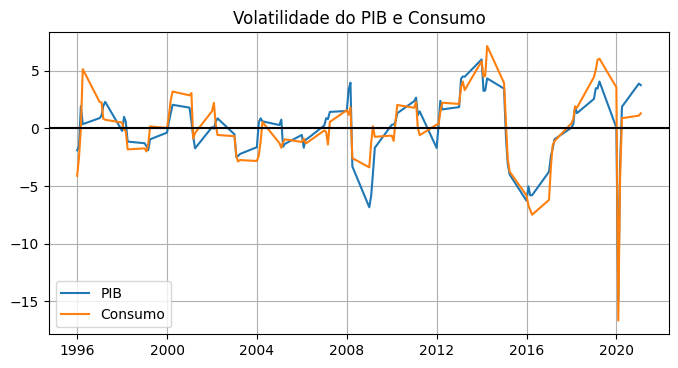

In [12]:
#Plotando volatilidade de PIB e Consumo
plt.figure(figsize=(8, 4), dpi=100)
plt.title('Volatilidade do PIB e Consumo')
plt.grid()
plt.plot(series["Data"],series["PIB - Ciclico"], label="PIB")
plt.plot(series["Data"],series["Consumo - Ciclico"], label="Consumo")
plt.axhline(y=0, color="black")
plt.legend()
plt.show()

O consumo, em geral, é mais volátil do que o PIB.